In [ ]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Dense, InputLayer
from keras.models import Sequential

from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Data/skin_train/train.zip

Streaming output truncated to the last 5000 lines.
  inflating: Seborrheic Keratoses and other Benign Tumors/keloids-8.jpg  
  inflating: Seborrheic Keratoses and other Benign Tumors/keloids-80.jpg  
  inflating: Seborrheic Keratoses and other Benign Tumors/keloids-9.jpg  
  inflating: Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-100.jpg  
  inflating: Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-101.jpg  
  inflating: Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-102.jpg  
  inflating: Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-103.jpg  
  inflating: Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-104.jpg  
  inflating: Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-105.jpg  
  inflating: Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-106.jpg  
  inflating: Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-107.jpg  
  inflating: Seborrheic Keratoses and other Benign Tum

In [ ]:
import shutil
import os
import tensorflow as tf

In [ ]:
base_dir = '/content/train/'
os.mkdir(base_dir)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('/content/')

In [ ]:
li = [
  'Acne and Rosacea Photos',
 'Bullous Disease Photos',
 'Herpes HPV and other STDs Photos',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Vascular Tumors',
 'Light Diseases and Disorders of Pigmentation',
 'Warts Molluscum and other Viral Infections',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Seborrheic Keratoses and other Benign Tumors',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Atopic Dermatitis Photos',
 'Lupus and other Connective Tissue diseases',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Poison Ivy Photos and other Contact Dermatitis',
 'Vasculitis Photos',
 'Urticaria Hives',
 'Systemic Disease',
 'Nail Fungus and other Nail Disease',
 'Eczema Photos',
 'Melanoma Skin Cancer Nevi and Moles',
 'Exanthems and Drug Eruptions',
 'Scabies Lyme Disease and other Infestations and Bites',
 'Cellulitis Impetigo and other Bacterial Infections']

In [ ]:
for i in li:
  path = '/content/' + i
  shutil.move(path, base_dir)


In [ ]:
!unzip /content/drive/MyDrive/Data/skin_validation/test.zip

Archive:  /content/drive/MyDrive/Data/skin_validation/test.zip
  inflating: Acne and Rosacea Photos/07PerioralDermEye.jpg  
  inflating: Acne and Rosacea Photos/07Rhinophyma1.jpg  
  inflating: Acne and Rosacea Photos/07RosaceaFulFAce.jpg  
  inflating: Acne and Rosacea Photos/07RosaceaMilia0120.jpg  
  inflating: Acne and Rosacea Photos/07RosaceaOK0828063.jpg  
  inflating: Acne and Rosacea Photos/07SteroidPerioral.jpg  
  inflating: Acne and Rosacea Photos/07SteroidPerioral1.jpg  
  inflating: Acne and Rosacea Photos/07VascularFace0120.jpg  
  inflating: Acne and Rosacea Photos/07rhnophymas0321051.jpg  
  inflating: Acne and Rosacea Photos/07sebDerem1101051.jpg  
  inflating: Acne and Rosacea Photos/08PerioralDerm1.jpg  
  inflating: Acne and Rosacea Photos/ComedonesEars-1.jpg  
  inflating: Acne and Rosacea Photos/Forest-2.jpg  
  inflating: Acne and Rosacea Photos/Hidradenitis-Suppurativa-Areola-2.jpg  
  inflating: Acne and Rosacea Photos/Sebaceous-glands-Areola-4.jpg  
  inflatin

In [ ]:
val_dir = '/content/validation/'
os.mkdir(val_dir)

In [ ]:
for i in li:
  path = '/content/' + i
  shutil.move(path, val_dir)

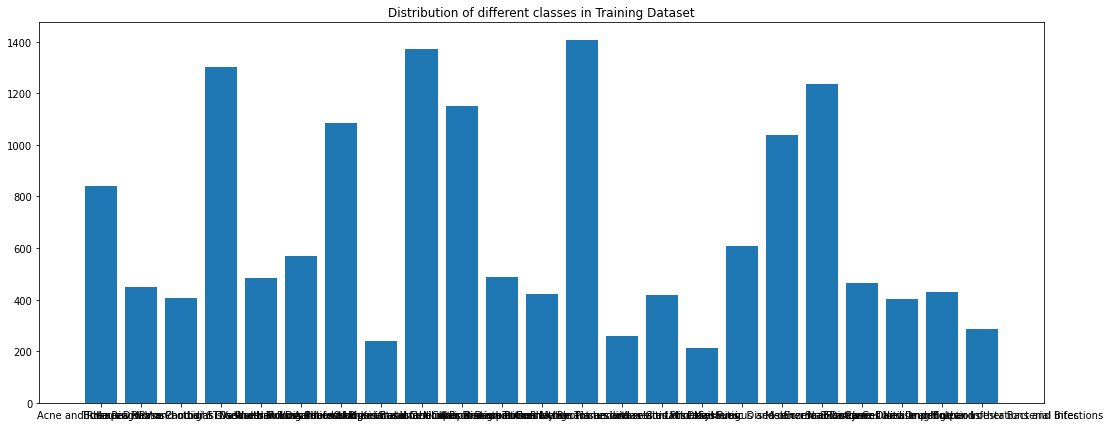

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = li
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(18, 7))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [ ]:
for i in li:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/train/'+i+'/'))))

Training Acne and Rosacea Photos images are: 840
Training Bullous Disease Photos images are: 448
Training Herpes HPV and other STDs Photos images are: 405
Training Tinea Ringworm Candidiasis and other Fungal Infections images are: 1300
Training Vascular Tumors images are: 482
Training Light Diseases and Disorders of Pigmentation images are: 568
Training Warts Molluscum and other Viral Infections images are: 1086
Training Hair Loss Photos Alopecia and other Hair Diseases images are: 239
Training Seborrheic Keratoses and other Benign Tumors images are: 1371
Training Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions images are: 1149
Training Atopic Dermatitis Photos images are: 489
Training Lupus and other Connective Tissue diseases images are: 420
Training Psoriasis pictures Lichen Planus and related diseases images are: 1405
Training Poison Ivy Photos and other Contact Dermatitis images are: 260
Training Vasculitis Photos images are: 416
Training Urticaria Hives images 

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# importing maxpool layer from keras
from keras.layers import MaxPool2D

In [ ]:
img_width=224; img_height=224
batch_size=64

In [ ]:
TRAINING_DIR = '/content/train'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 15557 images belonging to 23 classes.


In [ ]:
VALIDATION_DIR = '/content/validation'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 4002 images belonging to 23 classes.


In [ ]:
IMG_SHAPE = (img_width, img_height, 3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top = False,
                                               weights='imagenet')

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
model = tf.keras.Sequential([base_model,
                             tf.keras.layers.Conv2D(100, 3, activation='relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.GlobalAveragePooling2D(),
                             tf.keras.layers.Dense(23, activation="softmax")
                             ])

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 5, 5, 100)         1152100   
_________________________________________________________________
dropout_28 (Dropout)         (None, 5, 5, 100)         0         
_________________________________________________________________
global_average_pooling2d_21  (None, 100)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 23)                2323      
Total params: 3,412,407
Trainable params: 1,154,423
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
epochs = 5
history = model.fit(train_generator, epochs=epochs, validation_data = validation_generator)

Epoch 1/5
244/244 [==============================] - 337s 1s/step - loss: 2.9746 - accuracy: 0.1415 - val_loss: 2.8574 - val_accuracy: 0.1727
Epoch 2/5
244/244 [==============================] - 299s 1s/step - loss: 2.8191 - accuracy: 0.1683 - val_loss: 2.7922 - val_accuracy: 0.1879
Epoch 3/5
244/244 [==============================] - 300s 1s/step - loss: 2.7582 - accuracy: 0.1721 - val_loss: 2.7416 - val_accuracy: 0.1854
Epoch 4/5
244/244 [==============================] - 299s 1s/step - loss: 2.6987 - accuracy: 0.1920 - val_loss: 2.6820 - val_accuracy: 0.2021
Epoch 5/5
244/244 [==============================] - 297s 1s/step - loss: 2.6356 - accuracy: 0.2078 - val_loss: 2.6265 - val_accuracy: 0.2109


In [ ]:
# defining the model architecture with maxpool layer

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.6))
model.add(Dense(units=100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.6))
model.add(Dense(units=23, activation='sigmoid'))

# compiling the model
model.compile(loss='category_crossentropy', optimizer="adam", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 220, 220, 50)      3800      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 110, 110, 50)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 50)      62550     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 50)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 33800)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               3380100   
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)              

In [ ]:
# model = Sequential([
#     Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
#     Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
#     Conv2D(64, (3, 3), activation='relu'),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Conv2D(128, (3, 3), activation='relu'),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Conv2D(256, (3, 3), activation='relu'),
#     Conv2D(256, (3, 3), activation='relu'),
#     Conv2D(256, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dense(512, activation='relu'),
#     Dense(23, activation='softmax')
# ])
# model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 58, 58, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 64)        0

In [ ]:
# model.compile(optimizer='Adam', 
#               loss='categorical_crossentropy', 
#               metrics =['accuracy'])

In [ ]:

history = model.fit_generator(train_generator,
                              epochs=6,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

Epoch 1/6


ValueError: ignored

In [ ]:
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)), '%')

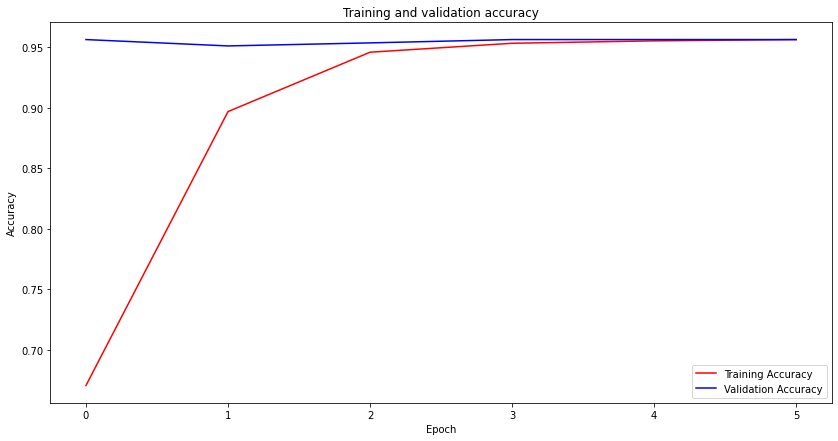

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

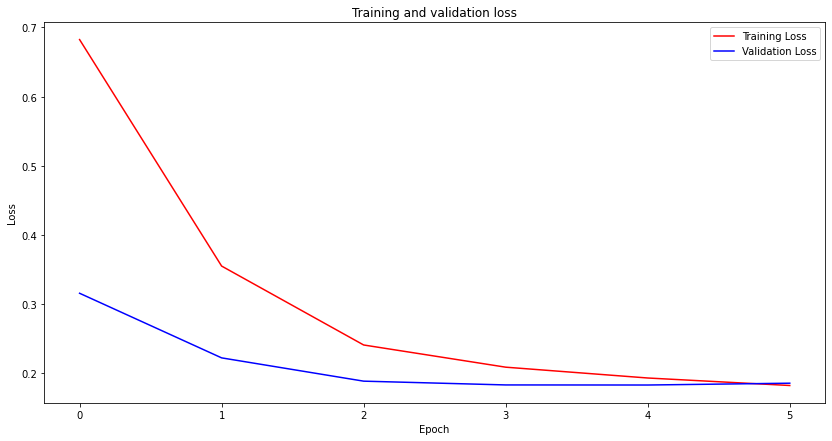

In [ ]:


fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')



In [ ]:
import tensorflow as tf

In [ ]:
saved_model_dir = ''
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


In [ ]:
print(train_generator.class_indices)
labels = '\n'.join(sorted(train_generator.class_indices.keys()))
labels
with open('labels.txt', 'w') as f:
  f.write(labels)

{'Acne and Rosacea Photos': 0, 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions': 1, 'Atopic Dermatitis Photos': 2, 'Bullous Disease Photos': 3, 'Cellulitis Impetigo and other Bacterial Infections': 4, 'Eczema Photos': 5, 'Exanthems and Drug Eruptions': 6, 'Hair Loss Photos Alopecia and other Hair Diseases': 7, 'Herpes HPV and other STDs Photos': 8, 'Light Diseases and Disorders of Pigmentation': 9, 'Lupus and other Connective Tissue diseases': 10, 'Melanoma Skin Cancer Nevi and Moles': 11, 'Nail Fungus and other Nail Disease': 12, 'Poison Ivy Photos and other Contact Dermatitis': 13, 'Psoriasis pictures Lichen Planus and related diseases': 14, 'Scabies Lyme Disease and other Infestations and Bites': 15, 'Seborrheic Keratoses and other Benign Tumors': 16, 'Systemic Disease': 17, 'Tinea Ringworm Candidiasis and other Fungal Infections': 18, 'Urticaria Hives': 19, 'Vascular Tumors': 20, 'Vasculitis Photos': 21, 'Warts Molluscum and other Viral Infections': 22}
